## Objectives

🎯 EXPECTED RESULTS:

FOR THE CLIENT/COMPANY:

- 📈 Which features most increase the property value?

- 🏡 Profile of premium properties: What do they have in common?

- 💰 Price prediction: How much is a property with X characteristics worth?

- 📍 Geographic analysis: Where are the most valued properties located?

FOR YOUR LEARNING:

- ✅ Apply the entire ML flow we learned
- ✅ Work with real real estate market data
- ✅ Create a complete project for your portfolio
- ✅ Present results professionally

🎯 QUESTIONS WE WILL ANSWER:

- "How much does the price increase per additional square meter?"

- "Is the water view really worth it?"

- "What is the impact of location (ZIP code) on the price?"

- "What differentiates a property worth $650K+ from others?"

- "Can we predict the price with good accuracy?"

🚀 SUMMARY: YOU WILL BUILD...

A real estate valuation system that:

- ✅ Analyzes the King County market
- ​​✅ Identifies the most important price drivers
- ✅ Predicts prices of new properties
- ✅ Provides insights into premium properties


## About the Data:

This dataset comprises one-year data (from May 2014 to May 2015) of house sale prices across King County, including Seattle. It features 21 different columns, providing a comprehensive overview of the real estate market:

- id: A unique identifier for a house.

- date: The date on which the house was sold.

- price: The sale price of the house (prediction target).

- bedrooms: Number of bedrooms in the house.

- bathrooms: Number of bathrooms in the house, per bedroom.

- sqft_living: Square footage of the interior living space.

- sqft_lot: Square footage of the land space.

- floors: Number of floors (levels) in the house.

- waterfront: Whether the house has a waterfront view.

- view: Number of times the house has been viewed.

- condition: The overall condition of the house.

- grade: The overall grade given to the house, based on the King County grading system.

- sqft_above: Square footage of the house apart from the basement.

- sqft_basement: Square footage of the basement.

- yr_built: The year the house was built.

- yr_renovated: The year the house was renovated.

- zipcode: ZIP code area.

- lat: Latitude coordinate.

- long: Longitude coordinate.

- sqft_living15: The interior living space for the nearest 15 neighbors in 2015.

- sqft_lot15: The land spaces for the nearest 15 neighbors in 2015.

## Imports

In [6]:
# DATA MANIPULATION
import pandas as pd
import numpy as np

# VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# STATISTICS
from scipy import stats
from scipy.stats import norm, skew

# MACHINE LEARNING
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# UTILITIES
import warnings
warnings.filterwarnings('ignore')
import joblib
import json
from datetime import datetime

# VISUALIZATION SETTINGS
plt.style.use('seaborn-v0_8')
%matplotlib inline
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (8, 5)

## EDA

### Reading the Data

In [7]:
path= "data/king_ country_ houses_aa.csv"
data= pd.read_csv(path)

In [8]:
df= pd.DataFrame(data)
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


### Inicial Analysis

In [9]:
df.shape  # Check dataset dimensions

(21613, 21)

In [10]:
df.columns.tolist()  # List all column names

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [11]:
display(df.head())  # Show first few rows of the dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
(df.tail())  # Show last few rows of the dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [13]:
df.describe()  # Statistical summary of numerical columns

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
df.info() # Overview of DataFrame structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [15]:
df['bathrooms'] # Cheking 'bathrooms' column

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21613, dtype: float64

In [16]:
df['floors'] # We have to transform this to int type

0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
21608    3.0
21609    2.0
21610    2.0
21611    2.0
21612    2.0
Name: floors, Length: 21613, dtype: float64

In [17]:
df.isnull().sum()  # Check for missing values in each column

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
df.isnull().sum().sum() # Total number of missing values in the DataFrame

0

* There is no Missing Values

In [19]:
df.duplicated().sum()  # Check for duplicate rows

0

* There is no Duplicated Values

### Target Analysis

In [20]:
print("=" * 51)
print("|           🔍 Structure Data Analysis            |")
print("=" * 51)
print("|           🎯 Target Variable (price):           |")
print("=" * 51)
print(df['price'].value_counts()) # Frequency of each unique value in 'price' column
print('\n')
print("=" * 51)
print('\n')
print(f"Proportion: {df['price'].value_counts(normalize=True)}") # Proportion of each unique value in 'price' column

|           🔍 Structure Data Analysis            |
|           🎯 Target Variable (price):           |
price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64




Proportion: price
350000.0     0.007958
450000.0     0.007958
550000.0     0.007357
500000.0     0.007033
425000.0     0.006940
               ...   
607010.0     0.000046
1362500.0    0.000046
298800.0     0.000046
957500.0     0.000046
402101.0     0.000046
Name: proportion, Length: 4028, dtype: float64


## Plots

In [21]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns # Selecting numerical columns
cat_cols = df.select_dtypes(include=['object']).columns # Selecting categorical columns

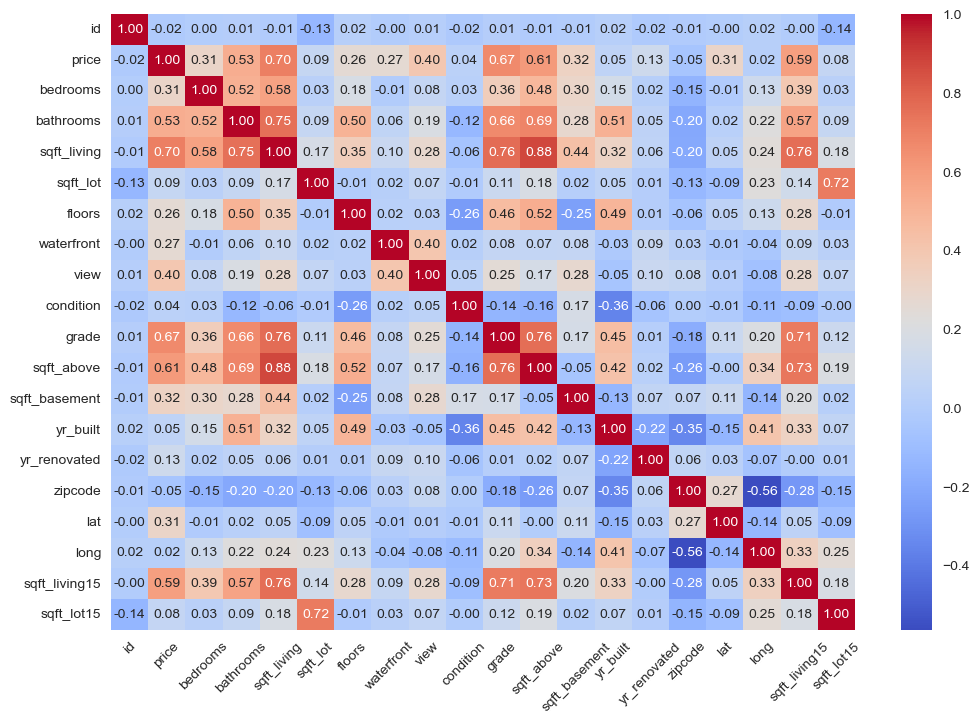

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), # Correlation matrix
            annot=True, # Show correlation coefficients
            fmt=".2f", # Format for the coefficients
            cmap='coolwarm', # Color map
            )
plt.xticks(rotation=45)
plt.show()

* 'Grade' is a great candidate for predict analysis